<a href="https://colab.research.google.com/github/luvkhandelwal/MSc-Thesis/blob/main/USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import r2_score

unclean_data=pd.read_csv('complete_dataset_uncleaned_new.csv')
data3=unclean_data.iloc[:,2:]
data3.index=data3.location
data3.pop('date')
data3.pop('location')

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(data3)
c=data3.columns
i=data3.index

data2 = pd.DataFrame(scaler.transform(data3))

In [ ]:
seed_value= 123

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
data2=clean_dataset(data2)

In [ ]:
#X=X.iloc[:,[0,1,3,5,6,7,8,11]]
data = pd.read_csv('United_States2.csv')
data.pop('Pkey')
data.pop('human_development_index')


data=data.iloc[:,1:]
data.head()
data

,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,gdp_percentage_weekly,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,United States,7/15/2020,197.013,2.858,1.13,0.0,68.98,NaN,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,27.433
1,United States,7/16/2020,210.135,2.887,1.11,0.0,68.98,NaN,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,29.071
2,United States,7/17/2020,196.868,2.733,1.10,0.0,68.98,NaN,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,31.751
3,United States,7/18/2020,190.782,2.638,1.09,0.0,68.98,NaN,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,32.531
4,United States,7/19/2020,175.028,1.433,1.08,0.0,68.98,NaN,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,30.466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data1=data[data['location']=='United States']
data1.pop('location')
data1.index=data1.date
data1.pop('date')
data1

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,gdp_percentage_weekly,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,,
7/15/2020,197.013,2.858,1.13,0.00,68.98,NaN,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,27.433
7/16/2020,210.135,2.887,1.11,0.00,68.98,NaN,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,29.071
7/17/2020,196.868,2.733,1.10,0.00,68.98,NaN,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,31.751
7/18/2020,190.782,2.638,1.09,0.00,68.98,NaN,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,32.531
7/19/2020,175.028,1.433,1.08,0.00,68.98,NaN,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,30.466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/27/2021,1501.785,5.478,1.63,155.06,51.23,NaN,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,50.668
12/28/2021,1105.248,6.801,1.66,155.58,51.22,NaN,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,51.259
12/29/2021,1518.076,7.027,1.68,156.08,51.21,NaN,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,52.908


In [ ]:
#data1.pop('Day')
#data1.pop('Death Rising')
#data1.pop('Death Falling')
#data1.pop('RR rising')
data1.pop('gdp_percentage_weekly')


date
7/15/2020    NaN
7/16/2020    NaN
7/17/2020    NaN
7/18/2020    NaN
7/19/2020    NaN
              ..
12/27/2021   NaN
12/28/2021   NaN
12/29/2021   NaN
12/30/2021   NaN
12/31/2021   NaN
Name: gdp_percentage_weekly, Length: 535, dtype: float64

In [ ]:
a=data1.index
b=data1.columns
data1=pd.DataFrame(scaler.transform(data1))
data1.index=a
data1.columns=b
df=data1.iloc[:,[0,1,2,3,4,13]]
df=clean_dataset(df)
df

<ipython-input-3-19e362bcb334>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,icu_patients_per_million
date,,,,,,
7/15/2020,0.003869,0.005161,0.201739,0.000000,0.6898,0.152079
7/16/2020,0.004126,0.005213,0.198261,0.000000,0.6898,0.161159
7/17/2020,0.003866,0.004935,0.196522,0.000000,0.6898,0.176016
7/18/2020,0.003746,0.004763,0.194783,0.000000,0.6898,0.180340
7/19/2020,0.003437,0.002588,0.193043,0.000000,0.6898,0.168892
...,...,...,...,...,...,...
12/27/2021,0.029490,0.009892,0.288696,0.422657,0.5123,0.280885
12/28/2021,0.021703,0.012281,0.293913,0.424074,0.5122,0.284161
12/29/2021,0.029810,0.012689,0.297391,0.425437,0.5121,0.293303


In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


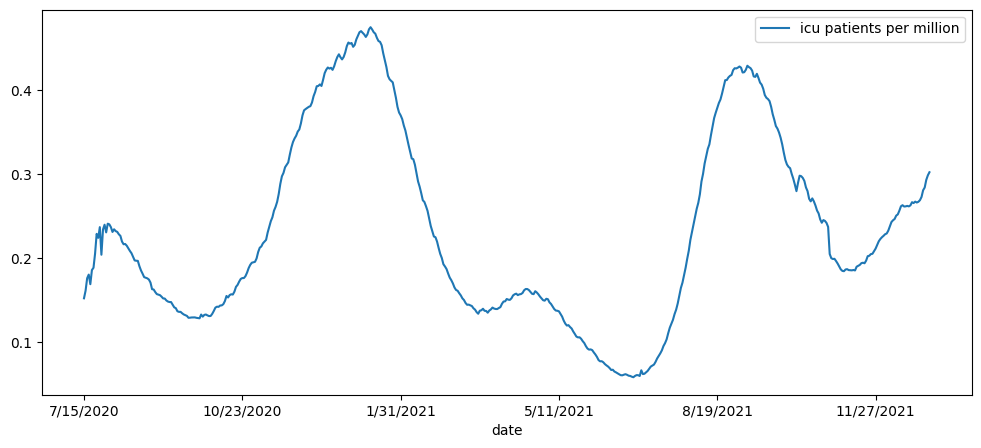

In [ ]:
df.icu_patients_per_million.plot(figsize=(12,5), label='icu patients per million')
plt.legend(loc="upper right")

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(df.shape)
train=df.iloc[:-90,:]
test=df.iloc[-90:,:]
print(train.shape,test.shape)
#stepwise_fit = auto_arima(train['icu_patients_per_million'],exog=train.iloc[:,0:4], m=14  ,trace=True, seasonal=True, suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
#print(test.iloc[0],test.iloc[-1])

(535, 6)
(445, 6) (90, 6)


90
0.07177865888478868
0.3539059817236594


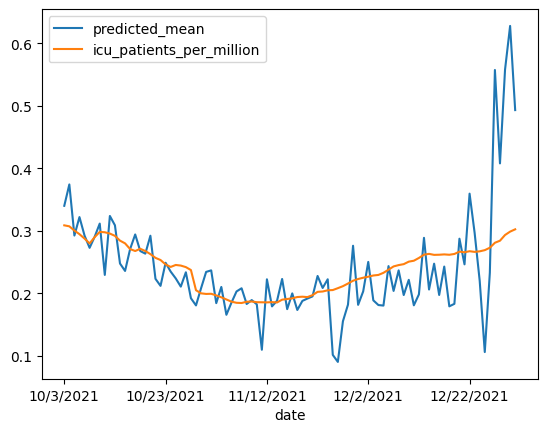

In [ ]:
modela=SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(3,0,5),seasonal_order=(2,0,2,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:4],start=start,end=end)
pred.index=df.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
rsquare= r2_score(pred,test['icu_patients_per_million'])
print(rmse)
print(rsquare)

In [ ]:
predicted_list, error_list = [], []
training_data = train
modela = SARIMAX(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:4] ,order=(3,0,5),seasonal_order=(2,0,2,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs

error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
print(r2_score(test.iloc[0:90,-1], predicted_list[0:90]))
training_error = model_fit.resid
training_error=np.array(training_error)


Test MSE: 0.005
-2.490078165793342


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1))
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 11/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 13/100
22/22 [=================

3/3 [==============================] - 0s 3ms/step


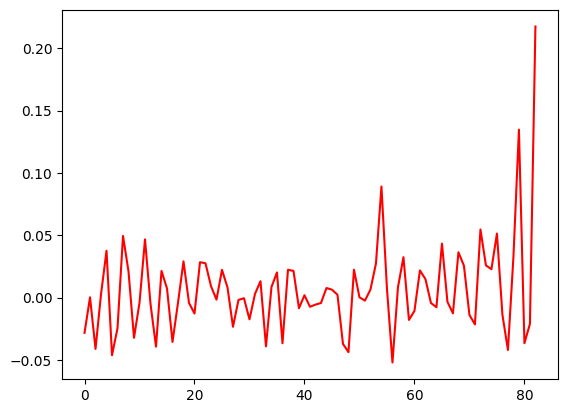

Test MSE: 0.008
-0.48701568956133556


In [ ]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)
print(r2_score(test_data[7:],predictions))

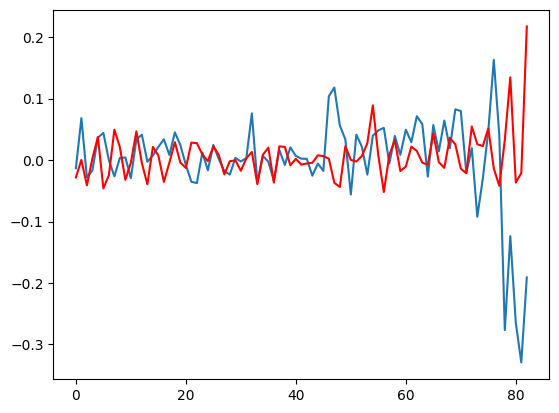

Test MSE: 0.008
-0.48701568956133556


In [ ]:
pred
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)
print(r2_score(test_data[7:],predictions))

Test MSE: 0.002
-0.48660765136056927


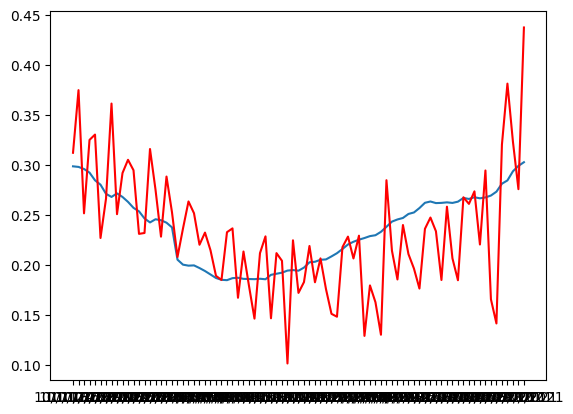

In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
print(r2_score(test.iloc[:83,-1],pred_final))
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

In [ ]:
p1=list(pred_final)
tmp=data1.iloc[-83:,:]
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p1[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p1=jnk.iloc[:,-1]
p1

0     56.248266
1     67.551547
2     45.323420
3     58.568203
4     59.531294
        ...    
78    57.727835
79    68.725901
80    58.258352
81    49.680245
82    78.855919
Name: 13, Length: 83, dtype: float64

In [ ]:
final={"falling":p1}
final=pd.DataFrame(p1)
final.to_csv('Output_2023_03_09.csv')